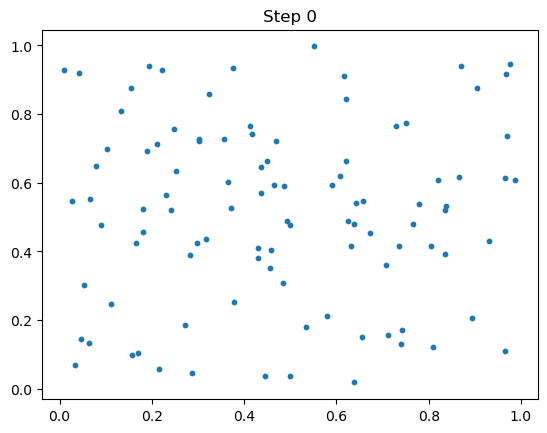

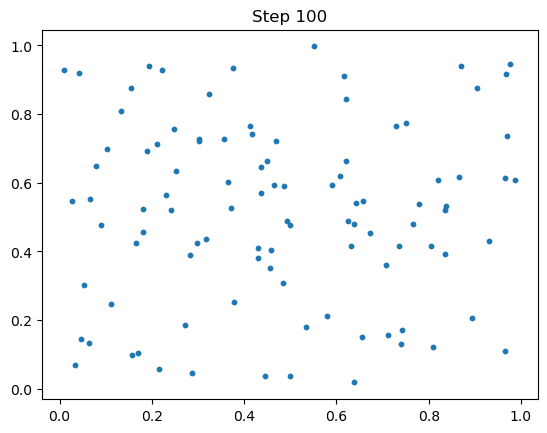

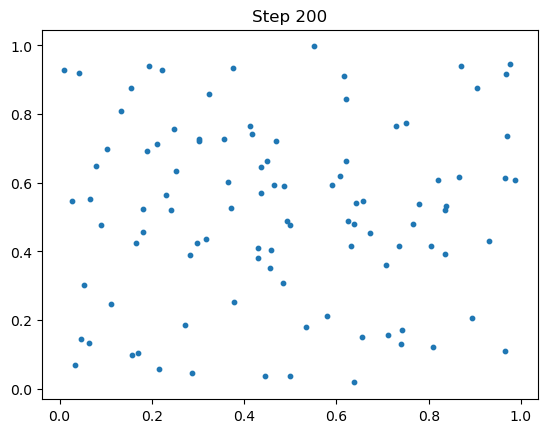

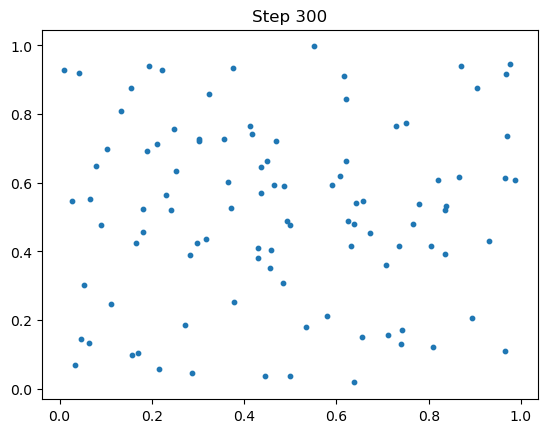

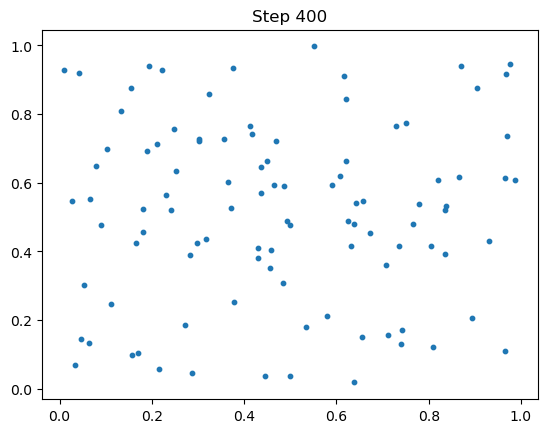

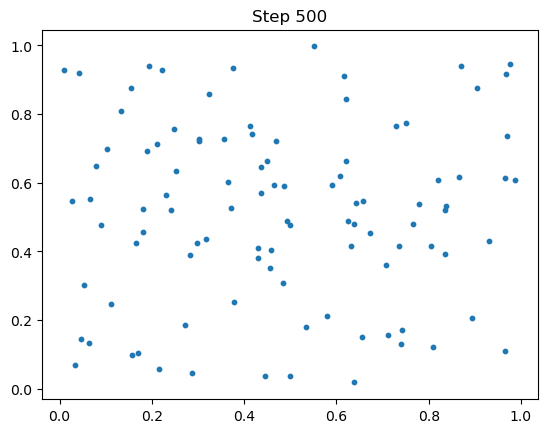

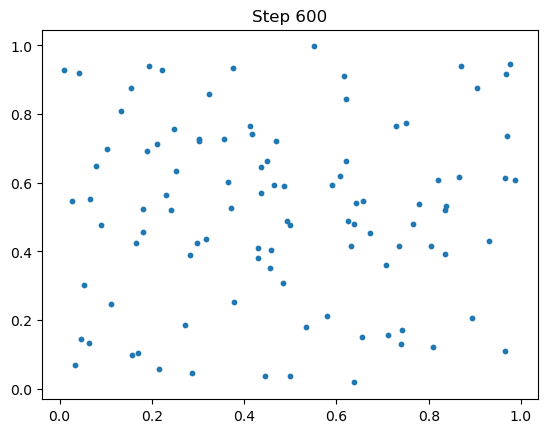

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 1.38e-23  # Boltzmann constant
T = 300  # Temperature in Kelvin
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
particle_radius = 1e-6  # Particle radius in meters
dipole_moment = 1e-12  # Magnetic dipole moment in Am^2
gamma = 6 * np.pi * 0.001  # Friction coefficient
time_step = 1e-6  # Time step
num_particles = 100  # Number of particles
num_steps = 1000  # Number of time steps

# Initialize particle positions, velocities, and dipole orientations
positions = np.random.rand(num_particles, 2)  # Random initial positions in 2D
velocities = np.zeros((num_particles, 2))
dipole_orientations = np.random.rand(num_particles, 2) * 2 * np.pi  # Random initial orientations

# Simulate Brownian motion with dipole-dipole interactions
for step in range(num_steps):
    # Generate random forces
    random_forces = np.random.normal(0, np.sqrt(2 * k_B * T * gamma / time_step), (num_particles, 2))

    # Calculate magnetic forces between particles
    magnetic_forces = np.zeros((num_particles, 2))
    for i in range(num_particles):
        for j in range(num_particles):
            if i != j:
                r = positions[j] - positions[i]
                r_magnitude = np.linalg.norm(r)
                r_unit = r / r_magnitude
                magnetic_force = (3 * mu_0 * dipole_moment**2 / (4 * np.pi * r_magnitude**5)) * (
                    np.dot(dipole_orientations[i], dipole_orientations[j]) * r_unit -
                    (dipole_orientations[i] - 3 * np.dot(dipole_orientations[i], r_unit) * r_unit)
                )
                magnetic_forces[i] += magnetic_force

    # Update particle positions, velocities, and dipole orientations using the Langevin equation
    velocities += (random_forces - gamma * velocities) * time_step
    positions += velocities * time_step
    dipole_orientations += np.random.normal(0, 0.1, (num_particles, 2))  # Random perturbations in orientations

    # Plot the particles' positions
    if step % 100 == 0:
        plt.scatter(positions[:, 0], positions[:, 1], s=10)
        plt.title(f'Step {step}')
        plt.show()

# Display the final positions
plt.scatter(positions[:, 0], positions[:, 1], s=10)
plt.title('Final Positions')
plt.show()


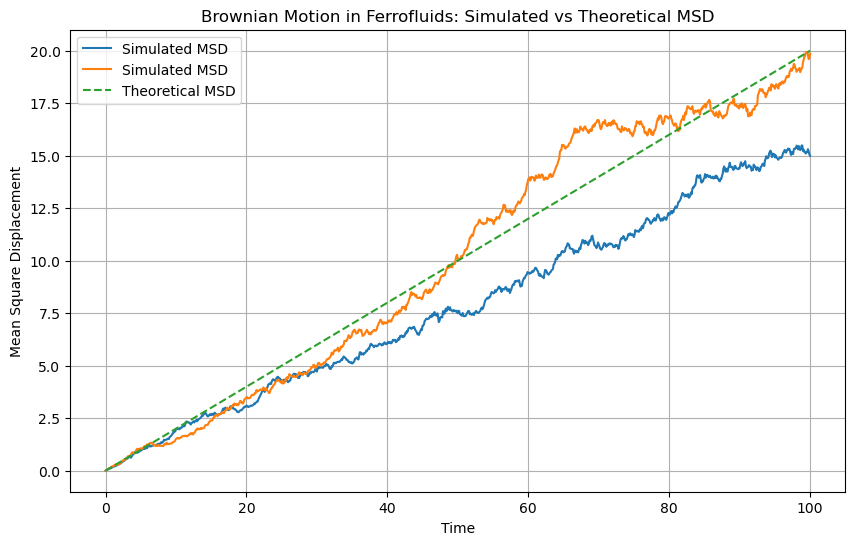

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
num_particles = 100
num_steps = 1000
time_step = 0.1
diffusion_coefficient = 0.1

# Initialize arrays to store particle positions over time
positions = np.zeros((num_particles, num_steps + 1, 2))
positions[:, 0] = np.random.randn(num_particles, 2)  # Initial positions

# Monte Carlo simulation
for step in range(1, num_steps + 1):
    random_displacements = np.sqrt(2 * diffusion_coefficient * time_step) * np.random.randn(num_particles, 2)
    positions[:, step] = positions[:, step - 1] + random_displacements

# Analytical solution for mean square displacement
theoretical_msd = 2 * diffusion_coefficient * time_step * np.arange(num_steps + 1)

# Calculate mean square displacement from simulations
simulated_msd = np.mean((positions - positions[:, 0:1]) ** 2, axis=0)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_steps + 1) * time_step, simulated_msd, label='Simulated MSD')
plt.plot(np.arange(num_steps + 1) * time_step, theoretical_msd, label='Theoretical MSD', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Mean Square Displacement')
plt.title('Brownian Motion in Ferrofluids: Simulated vs Theoretical MSD')
plt.legend()
plt.grid()
plt.show()


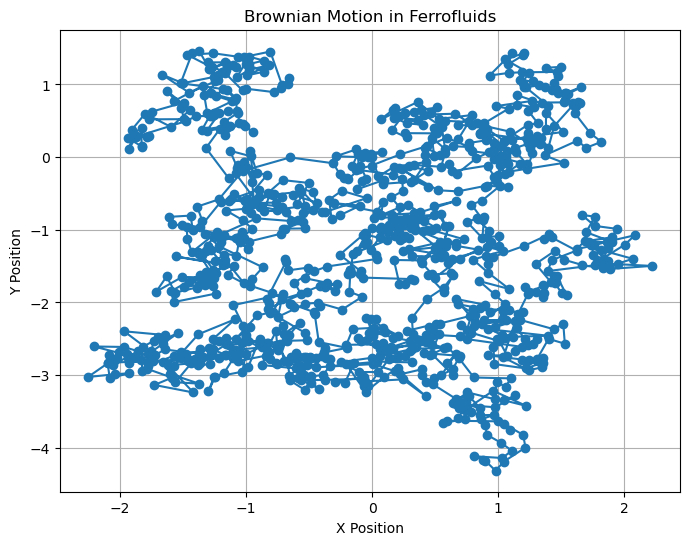

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
num_steps = 1000
time_step = 0.1
diffusion_coefficient = 0.1
magnetic_field_strength = 0.05

# Initial particle position
initial_position = np.array([0.0, 0.0])

# Initialize arrays to store particle positions over time
positions = np.zeros((num_steps + 1, 2))
positions[0] = initial_position

# Monte Carlo simulation
for step in range(1, num_steps + 1):
    # Generate random displacement based on Brownian motion
    random_displacement = np.sqrt(2 * diffusion_coefficient * time_step) * np.random.randn(2)
    
    # Calculate magnetic force based on external field
    magnetic_force = magnetic_field_strength * np.random.randn(2)
    
    # Update particle position
    new_position = positions[step - 1] + random_displacement + magnetic_force
    positions[step] = new_position

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1], marker='o')
plt.title("Brownian Motion in Ferrofluids")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid()
plt.show()
